<a href="https://colab.research.google.com/github/dzurel/Churn/blob/master/Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dzurel/Churn/master/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [0]:
df_e0 = df.loc[df.Exited == 0, :]
df_e1 = df.loc[df.Exited == 1, :]

Text(0.5, 1.0, 'Left the Bank')

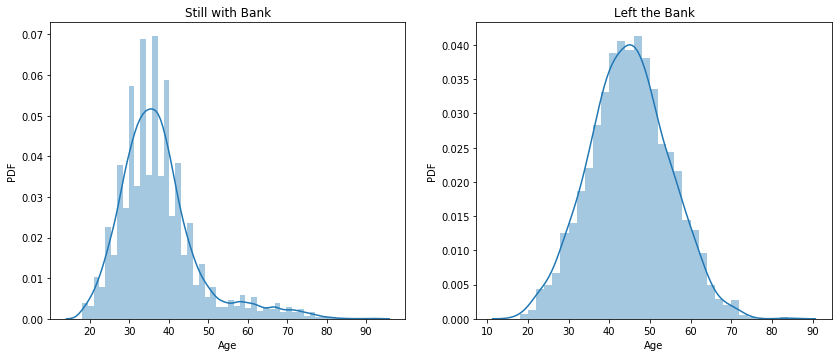

In [7]:
plt.figure(figsize=(14,12))
plt.subplot(2,2,1)
sns.distplot(df_e0['Age'])
plt.ylabel('PDF')
plt.title('Still with Bank')
plt.subplot(2,2,2)
sns.distplot(df_e1['Age'])
plt.ylabel('PDF')
plt.title('Left the Bank')


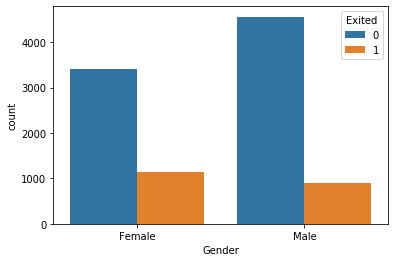

In [8]:
sns.countplot(df.Gender, hue=df.Exited)

### Inference
More female have left the bank than the male. The percentage of females left the bank is much higher than percentage of men who have left the bank.

In [9]:
perc_f_e1 = np.sum(df_e1.Gender == 'Female')*100 / np.sum(df.Gender == 'Female')
perc_m_e1 = np.sum(df_e1.Gender == 'Male')*100 / np.sum(df.Gender == 'Male')
perc_f_e1, perc_m_e1

(25.071538630860665, 16.455928165658786)

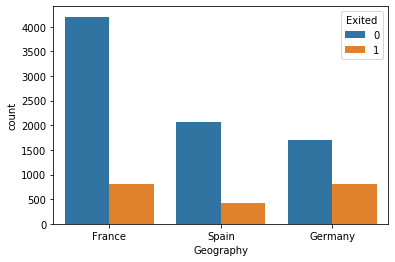

In [10]:
sns.countplot(df.Geography, hue=df.Exited)

In [11]:
perc_gf_e1 = np.sum(df_e1.Geography == 'France')*100 / np.sum(df.Geography == 'France')
perc_gs_e1 = np.sum(df_e1.Geography == 'Spain')*100 / np.sum(df.Geography == 'Spain')
perc_gg_e1 = np.sum(df_e1.Geography == 'Germany')*100 / np.sum(df.Geography == 'Germany')
perc_gf_e1, perc_gs_e1, perc_gg_e1

(16.15476665337056, 16.67339523617279, 32.44320446392985)

### Inference
It seems the highest percentage of people left by Geography is from Germany.

In [0]:
X = df.iloc[:,3:-1].values
y= df.iloc[:,-1].values


#Encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le_1= LabelEncoder()
X[:,1]=le_1.fit_transform(X[:,1])
le_2 = LabelEncoder()
X[:,2]=le_2.fit_transform(X[:,2])
oh= OneHotEncoder(categorical_features=[1])
X=oh.fit_transform(X).toarray()

X = X[:,1:]


#splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

Checking the database to see if there is any null value

In [0]:
df.isnull().sum()

Dropping unnecessary columns

In [0]:
df= df.drop(['RowNumber', 'CustomerId', 'Surname'], axis =1)

We can see that our target column is Exited. Lets examine it.

In [0]:
df.Exited.value_counts()

In [0]:
df.info()

In [0]:
df.describe()

In [0]:
exitcor = df.corr()
exitcor["Exited"].sort_values(ascending=False)

In [0]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df)

Using dummies for Making Gender, Geography columns binary.

In [0]:
dfc =pd.concat([pd.get_dummies(df['Gender'], drop_first =True, prefix='Gender'),
              pd.get_dummies(df['Geography'], drop_first=True, prefix ='Geography'),
              df.drop(['Gender', 'Geography'], axis =1)], axis =1)

In [0]:
dfc.head()

Splitting the data to rain and test sets and also dropping our target variable Exited.

Scaling the data using Standard Scaler

In [0]:
#Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### **Modeling and Evaluating**



### XGBOOST

In [0]:
from sklearn.metrics import roc_auc_score

import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict_proba(X_train)
print(roc_auc_score(y_train, y_pred[:,1]))

y_pred = xgb_model.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred[:,1]))

### AdaBoost

In [0]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred =ada.predict_proba(X_train)
print(roc_auc_score(y_train, y_pred[:,1]))

y_pred = ada.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred[:,1]))

### Gradient Boosting

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
GBC =GradientBoostingClassifier()

GBC.fit(X_train, y_train)
y_pred =GBC.predict_proba(X_train)
print(roc_auc_score(y_train, y_pred[:,1]))

y_pred = GBC.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred[:,1]))

### Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = "liblinear")
y_pred =GBC.predict_proba(X_train)
y_pred =GBC.predict_proba(X_train)
lr.fit(X_train, y_train)
y_pred =GBC.predict_proba(X_train)
y_pred = lr.predict_proba(X_train)
print(roc_auc_score(y_train, y_pred[:,1]))

y_pred = lr.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred[:,1]))

### ANN

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
classifier = Sequential()

In [0]:
#Add Sequential Layers

classifier.add(Dense(output_dim = 6, init='uniform' , activation = 'relu', input_dim = 11 ))
classifier.add(Dense(output_dim = 6, init='uniform' , activation = 'relu' ))
classifier.add(Dense(output_dim = 1, init='uniform' , activation = 'sigmoid'))

In [0]:
 #Compile the ANN
classifier.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics = ['accuracy'] )

#fit 
classifier.fit(X_train, y_train, batch_size= 10, epochs= 100)

#predict
y_pred= classifier.predict(X_test)

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred>0.5)

Ok we can predict if a customer is going to churn not not with %86.3 accuracy which is pretty nice.

### We can now conclude our findings
The median age of people whom the bank retained is 37 with most values between 30-40. The median age of people who exited the bank is 45 with most values between 40-50 and is normally distributed. To improve on this the bank has to provide special services to senior citizen.
It is female who left the bank more than the male. The percentage of female who left the bank is 25%, whereas for male its 16%. We can conclude that the bank does not make females comfortable. The bank will have to provide special female services.
The inactive members churned more with 27%. Only 14% active members churned. But active members churning shows that customers must have been unsatisfied for any new policy or some other bank provided a scheme with much better services
Most churning of customers happened in Germany with almost 32% of customers leaving the bank. Customers of Germany have the most salary and Balance. This means the bank is not able to cater the elite class with elite services.
In spain around half of the females have a balance of zero.
### Hypothesis for further investigation
-  Age of people who left the bank and who did not are similar. 
-  Credit score of people who left the bank and who did not are similar. 
-  Balance of people who left the bank and who did not are similar. 
-  Estimated Salary of people who left the bank and who did not are similar.